## Introduction

### Objective: We want to compare song popularity to the different columns (features) and see how well those features will correlate with the song popularity to see which features are predictable.

### Hypothesis: 

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from scipy import stats

## Part 1

- Reading in data
- Representation of the data (data.infom, data.describe)
- Clean the data
- set the correct categories for the features, agree on whats categorical and numerical


In [2]:
song = pd.read_csv("data_big.csv")

### Feature Descriptions

 - **id** (id of the track generated by spotify)
 - **artists** (list of artists mentioned)
 - **name** (name of the song)
 - **genres** (Genre of the song)
 - **year** (Range from 192 to 2020)
 - **duration_ms** (integer typically ranging from 200k to 300k)
 - **mode** (Minor = 0, Major = 1)
 - **explicit** (No explicit content = 0 , Explicit content = 1)
 - **Key** (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on)
 - **Popularity** (The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had)
 - **acousticness** (A confidence measure from 0.0 to 1.0 of wether the track is acoustic. 1.0 represents high confidence the track is acoustic)
 - **danceability** (Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, so a value of 0 is least danceable and 1.0 is the most danceable)
 - **energy** (Energy is a measure from 0.0 to 1.0 and it represents a measure of intensity and activity meaning fast, loud, and noisy)
 - **instrumentalness** (Predicts whether a track contains no vocals)
 - **valence** (A measure from 0.0 to 1.0 describing the musical positiviness conveyed by a track. Tracks with high valence sound with more positive track while low valence with sounds that are more negative)
 - **tempo** (Overall estimated temp of a track in beats per minute)
 - **liveness** (Detects the presence of an audience in the recording, high values mean more liveness)
 - **loudness** (Float typically ranging from -60 to 0 db)
 - **Speechiness** (Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording the closer it will be to 1.)

In [3]:
song.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [5]:
song.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [6]:
song.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
song_categorical = ['key', 'mode','explicit']
song_numerical = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'year']
combined_columns = song_categorical + song_numerical

## Part 2

- Visualization of the data
    - Scatter Plots
    - BoxPlots
    - Explainations for each plot
    - Include Value counts

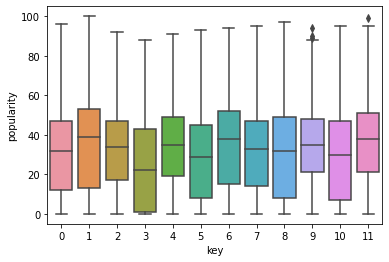

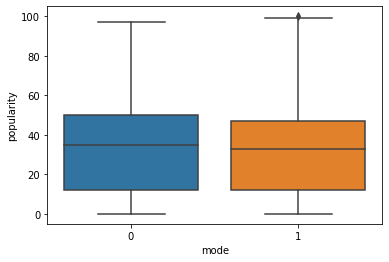

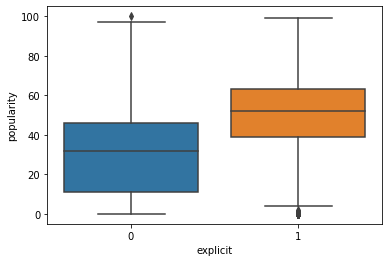

In [8]:
#categorical variables vs popularity
for cat in song_categorical:
    sns.boxplot(x=song[cat], y=song['popularity'])
    plt.savefig(cat + '_fig.png')
    plt.show()

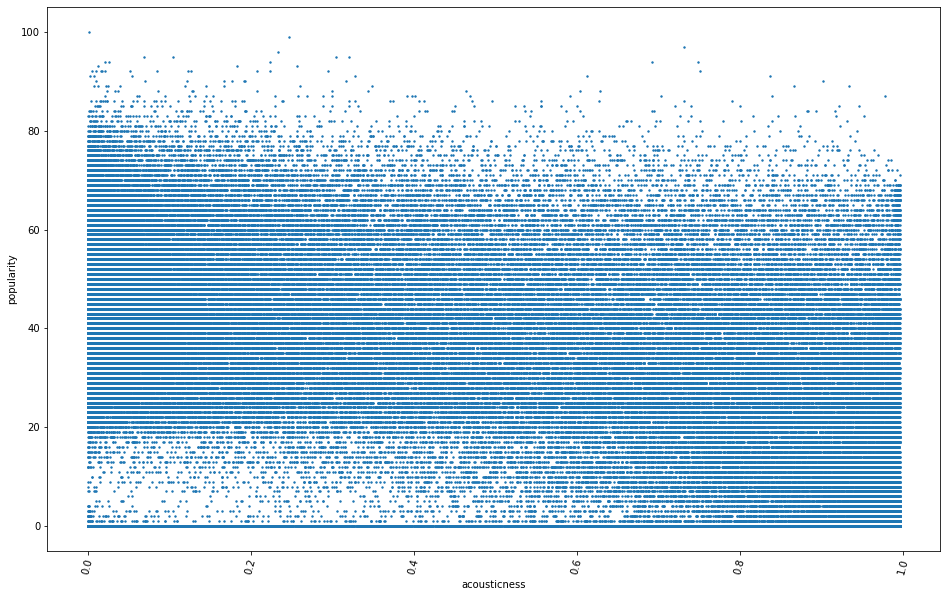

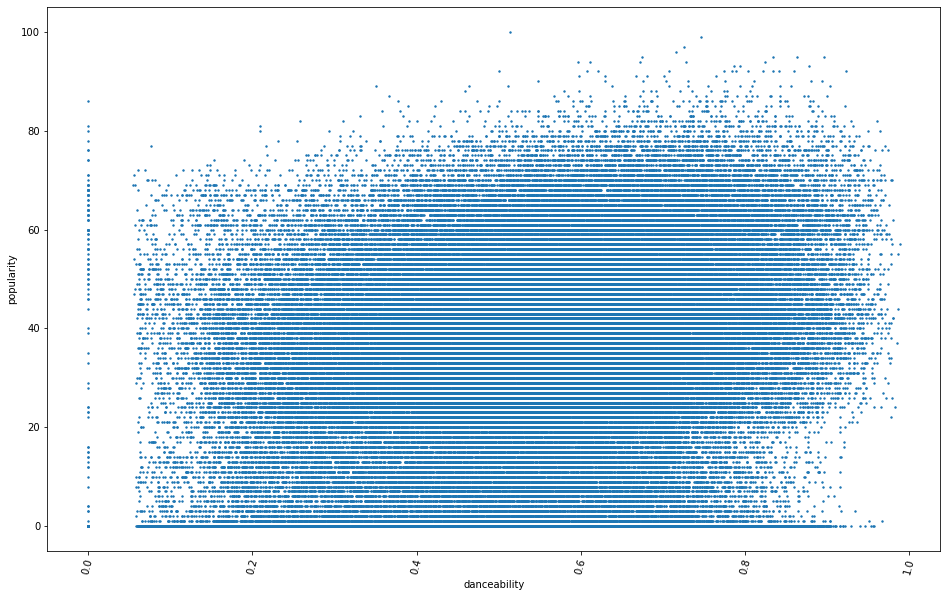

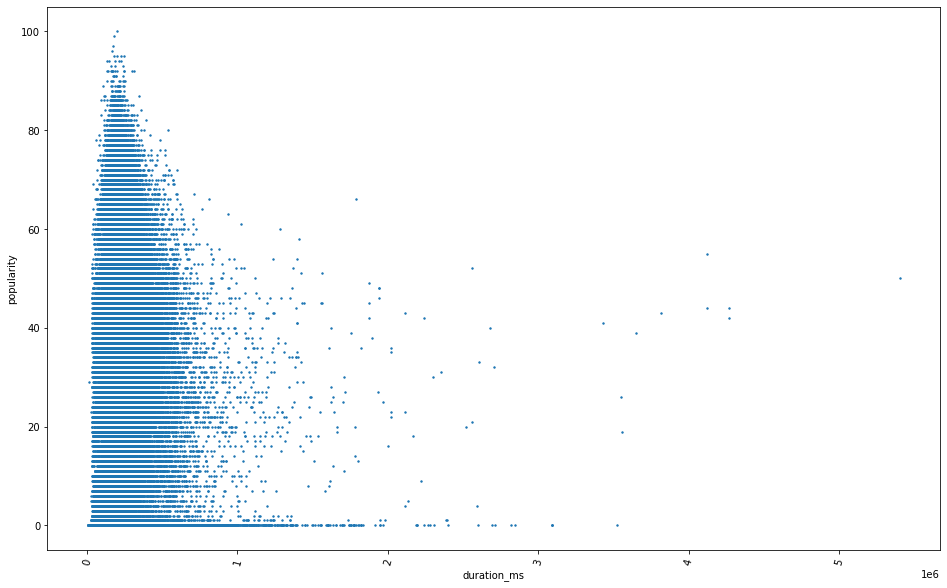

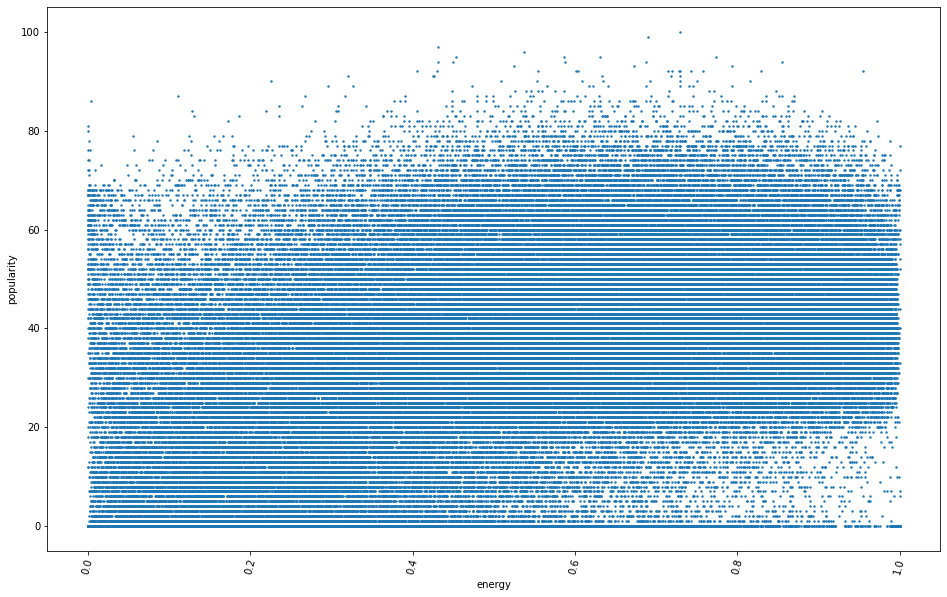

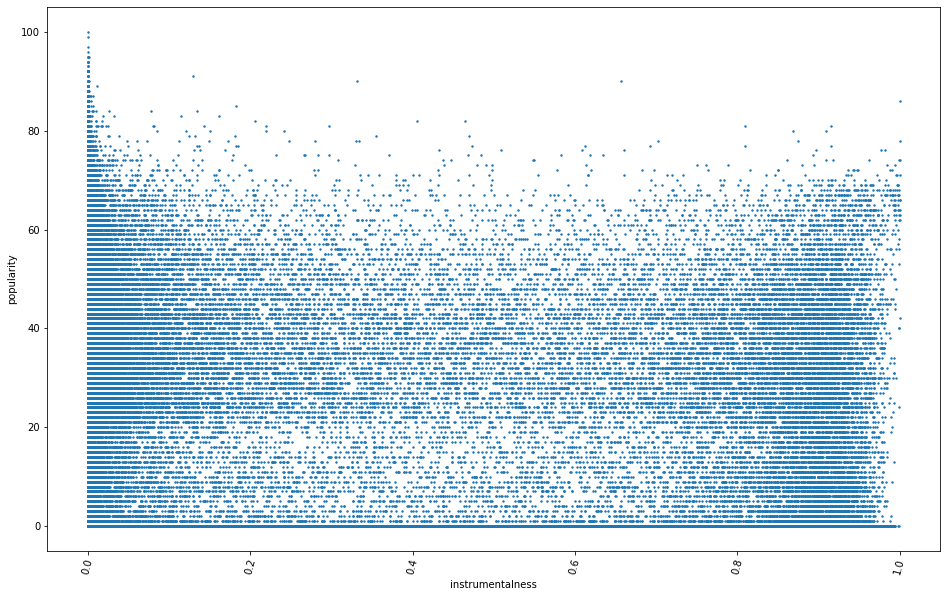

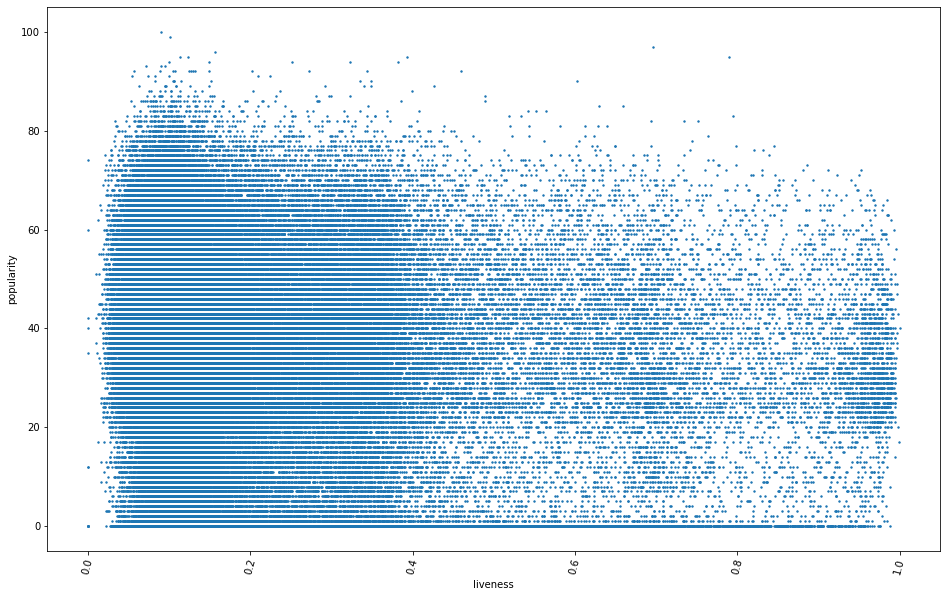

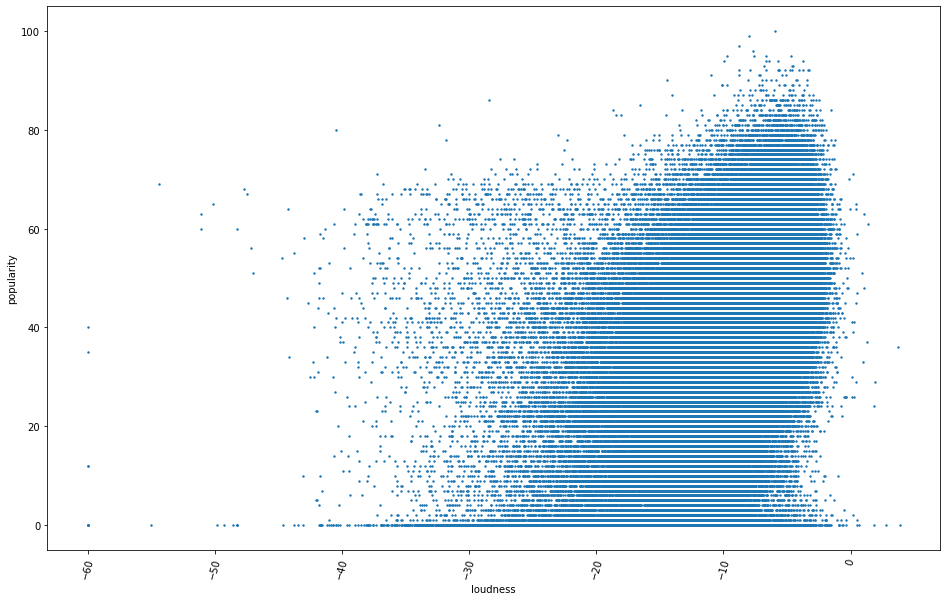

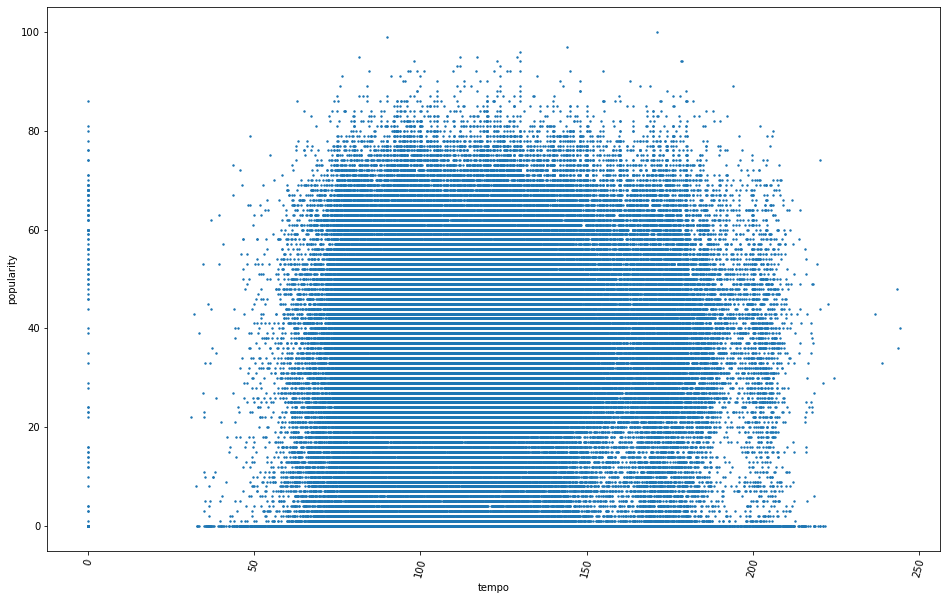

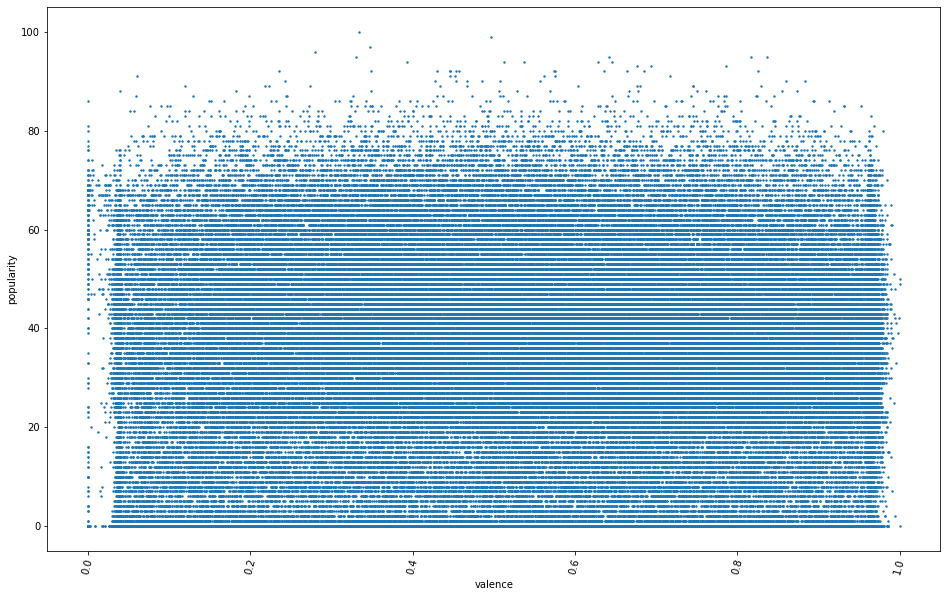

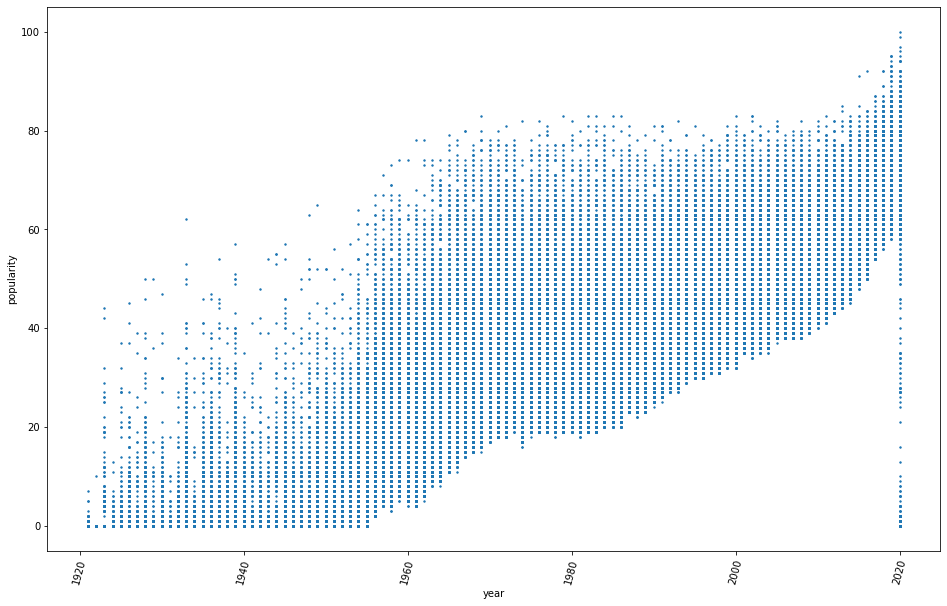

In [9]:
#numerical variables vs popularity
for num in song_numerical:
    song.plot.scatter(x=num, y='popularity', s=2)
    plt.xticks(rotation=75,
          fontweight='light',
          fontsize='medium')
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.savefig(num + '_fig.png')
    plt.show()

C:\Users\neidertv\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\neidertv\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\neidertv\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


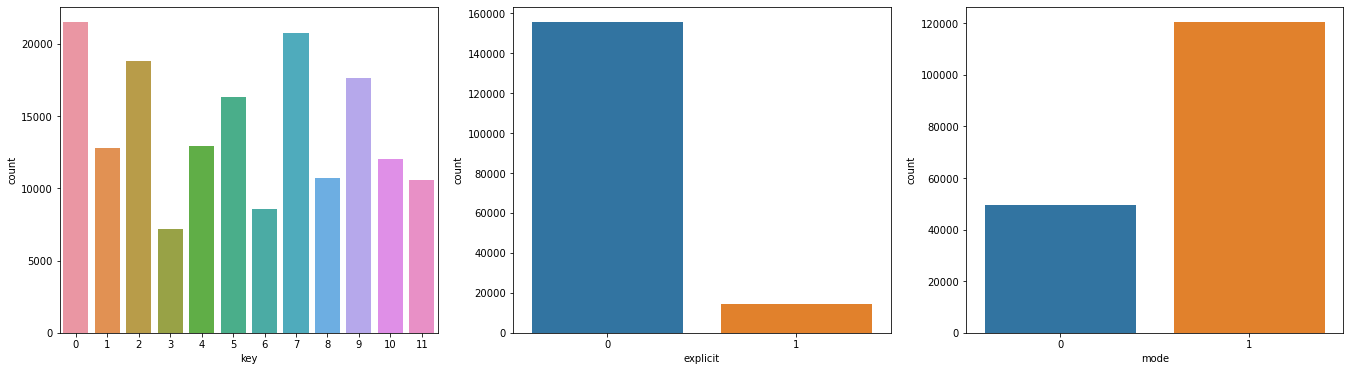

In [10]:
plt.figure(figsize=(23,6))
plt.subplot(131)
sns.countplot(song['key'])
plt.subplot(132)
sns.countplot(song['explicit'])
plt.subplot(133)
sns.countplot(song['mode'])
plt.show()

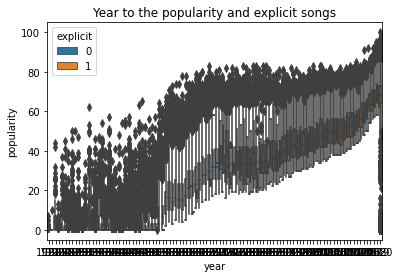

In [11]:
sns.boxplot(x='year', y='popularity', hue='explicit', data=song)
plt.title("Year to the popularity and explicit songs")
plt.show()

## Part 3 

- Statistical Testing
    - Chi test
    - Kruskal
- Summerize results from these tests
- Make table with the results

In [12]:
for i in song_numerical:
    combination_counts = song[['popularity', i]]\
                    .groupby(by=['popularity', i])\
                    .size().unstack(level=0).fillna(0)
    chi2, pValue, _, _ = stats.chi2_contingency(combination_counts)
    print(i, pValue)

acousticness 0.0
danceability 1.1290146547163013e-83
duration_ms 0.0
energy 1.412863266546919e-197
instrumentalness 1.0
liveness 0.9999999966727762
loudness 1.0
tempo 1.0
valence 1.0
year 0.0


In [13]:
#for i in song_categorical:
#    combination_counts = song[['popularity', i]]\
#                    .groupby(by=['popularity', i])\
#                    .size().unstack(level=0).fillna(0)
#    chi2, pValue, _, _ = stats.chi2_contingency(combination_counts)
#    print(i, pValue)

|Variable|P-Value|Significance of P-Value of 0.05|
| --- | --- | --- |
|acousticness|0.0|YES|
|danceability|1.1290146547163013e-83|YES|
|duration_ms| 0.0|YES|
|energy|1.412863266546919e-197|YES|
|instrumentalness|1.0|NO|
|liveness|0.9999999966727762|NO|
|loudness|1.0|NO|
|tempo|1.0|NO|
|valence|1.0|NO|
|year|1.0|NO|

## Part 4
- Linear Regression
- Clustering (DBScan)

In [14]:
song_numerical = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence', 'year']
for i in song_numerical:
    slope, intercept, r, pvalue , stderr = stats.linregress(song['popularity'], song[i])
    print(i,pvalue)

acousticness 0.0
danceability 0.0
duration_ms 2.471038632012217e-150
energy 0.0
instrumentalness 0.0
liveness 4.546234925123952e-212
loudness 0.0
tempo 0.0
valence 0.00012074135143241935
year 0.0


| Variable | Pvalue | Significance at Threshold of 0.01|
| --- | --- | --- |
|acousticness | 0.0 | Yes |
|danceability | 0.0 | Yes |
|duration_ms| 2.471038632012217e-150 | Yes |
|energy| 0.0 | Yes |
|instrumentalness| 0.0 | Yes |
|liveness| 4.546234925115416e-212| Yes |
|loudness| 0.0 | Yes |
|tempo| 0.0 | Yes |
|valence| 0.00012074135143241996 | Yes |
|year| 0.0 | Yes |

| Variable | R Values | Good Fit
| --- | --- | --- |
|acousticness |-0.5933452001831016| Negative |
|danceability | 0.221076890391612 | Positive Neutral |
|duration_ms| 0.06329177998309087 | Positive Neutral|
|energy| 0.49748833587696323 |Positive|
|instrumentalness|-0.29982923397827377 | Negative|
|liveness| -0.07529277078862263|Negative Neutral|
|loudness|0.466546008976029 |Positive|
|tempo| 0.13504699307240636 |Positive Neutral|
|valence| 0.00932692595139546|Positive Neutral|
|year| 0.880724164474985|Positive|

In [15]:
#clustering all of our features
features = song[['danceability', 'energy']]
len(features)

169909

In [16]:
features.head()

,danceability,energy
0,0.708,0.1950
1,0.379,0.0135
2,0.749,0.2200
3,0.781,0.1300
4,0.210,0.2040


In [17]:
#scaler = StandardScaler()
#features = scaler.fit_transform(features)

In [18]:
pca = PCA()
pca.n_components = 2
song_pca = pca.fit_transform(features)

In [ ]:
%%time
song_dbscan = DBSCAN(eps=2, min_samples=2).fit(features)
labels = song_dbscan.labels_

In [ ]:
y_pred = song_dbscan.fit_predict(features)

In [ ]:
plt.scatter(features.iloc[:,0], features.iloc[:,1], c=y_pred, cmap='Paired')

## Part 5 

- Conclusion
   - What features were the best predictors or popularity and tie all of the results together